# Import libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import imutils
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set default figure size
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

# Read in the pre-processed Gridded Population and Black Marble images

In [2]:
GPW_PATH = '../raster/GPWv4_WORLD_PlateCarre.tif'
BM_PATH = '../raster/BlackMarble_WORLD_PlateCarre.tif'

In [3]:
def show_image(image, title, colorbar=False, cmap=None):
    plt.grid(False)
    plt.imshow(image, cmap)
    if colorbar:
        plt.colorbar()
    plt.show()
    print title
    print "Image dimensions: {}".format(image.shape)

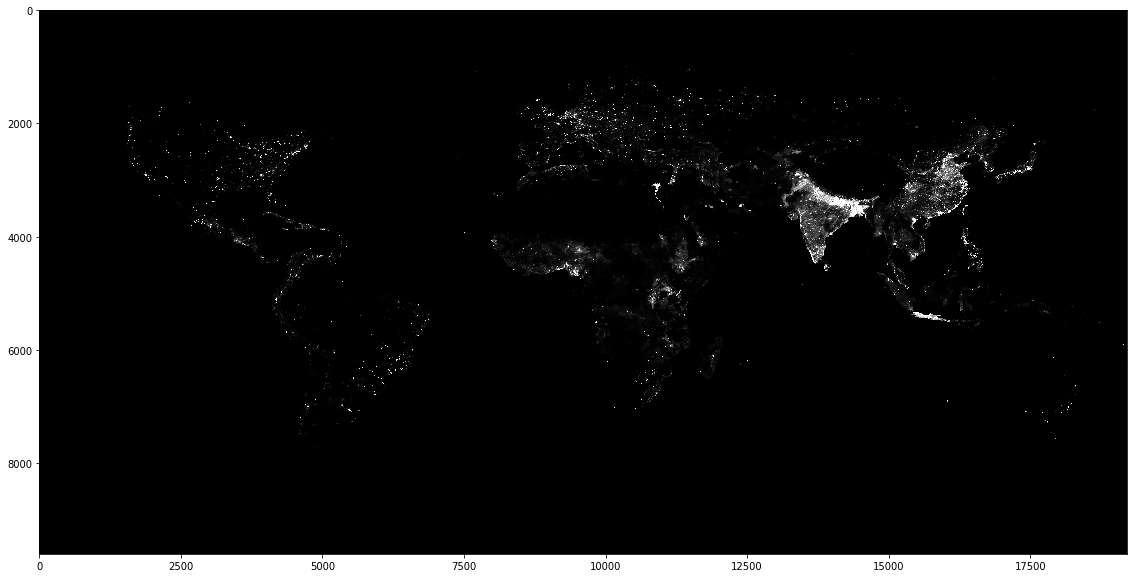

Gridded Population of the World
Image dimensions: (9600, 19200, 3)


In [4]:
GPW = cv2.imread(GPW_PATH)
show_image(GPW, "Gridded Population of the World")

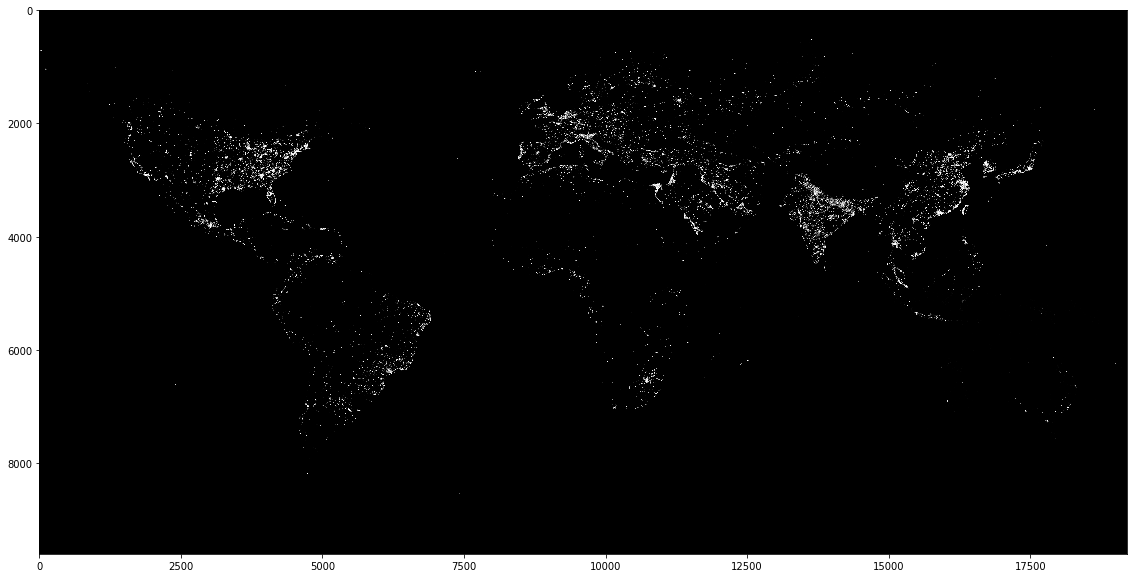

Black Marble
Image dimensions: (9600, 19200, 3)


In [5]:
BM = cv2.imread(BM_PATH)
show_image(BM, "Black Marble")

# Convert three bands to one (grayscale)

In [6]:
GPW_gray = cv2.cvtColor(GPW, cv2.COLOR_BGR2GRAY)

In [7]:
BM_gray = cv2.cvtColor(BM, cv2.COLOR_BGR2GRAY)

# Convert integers to floats

In [8]:
GPW_gray = GPW_gray.astype(float)

In [9]:
BM_gray = BM_gray.astype(float)

# Scale grayscale images to the range from 0 to 1

In [10]:
def min_max_scaler(image):
    image_scaled = (image - image.min()) / (image.max() - image.min())
    return image_scaled

In [11]:
GPW_gray_scaled = min_max_scaler(GPW_gray)

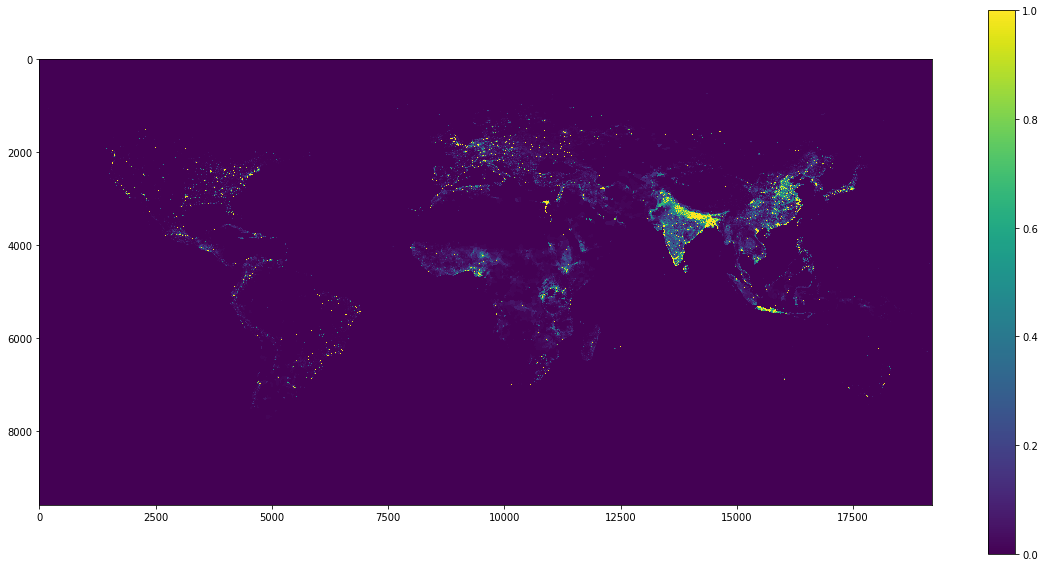

Gridded Population of the World (Scaled)
Image dimensions: (9600, 19200)


In [12]:
show_image(GPW_gray_scaled, "Gridded Population of the World (Scaled)", cmap='viridis', colorbar=True)

In [13]:
BM_gray_scaled = min_max_scaler(BM_gray)

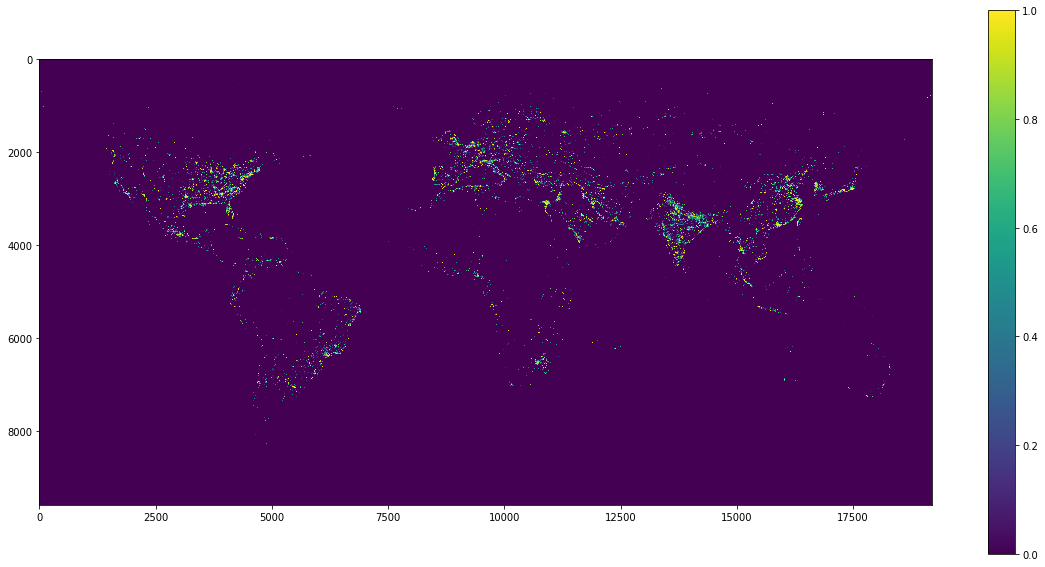

Black Marble (Scaled)
Image dimensions: (9600, 19200)


In [14]:
show_image(BM_gray_scaled, "Black Marble (Scaled)", cmap='viridis', colorbar=True)

# Calculate difference between Gridded Population and Black Marble

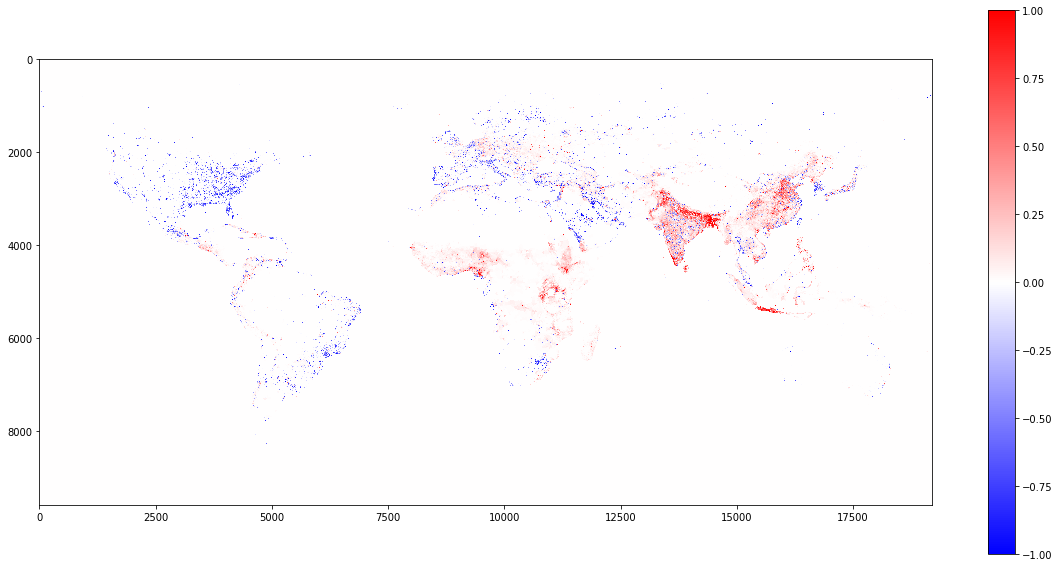

Gridded Population minus Black Marble
Image dimensions: (9600, 19200)


In [15]:
diff = GPW_gray_scaled - BM_gray_scaled
show_image(diff, "Gridded Population minus Black Marble", cmap='bwr', colorbar=True)

# Save difference to TIFF file

In [16]:
def array_to_image(array):
    array_scaled = min_max_scaler(array)    # Min-max scaling
    array_scaled = array_scaled * 255       # Multiply by 255
    array_scaled = np.uint8(array_scaled)   # Convert to 8-bit integers
    image = Image.fromarray(array_scaled)   # Create image from array
    return image

In [17]:
diff_image = array_to_image(diff)

In [18]:
diff_image.save("difference.tiff")

# Compare Los Angeles Black Marble to Los Angeles GPW

Zooming in to raster using QGIS and uploading to imgur.

#### Los Angeles Gridded Population of the World

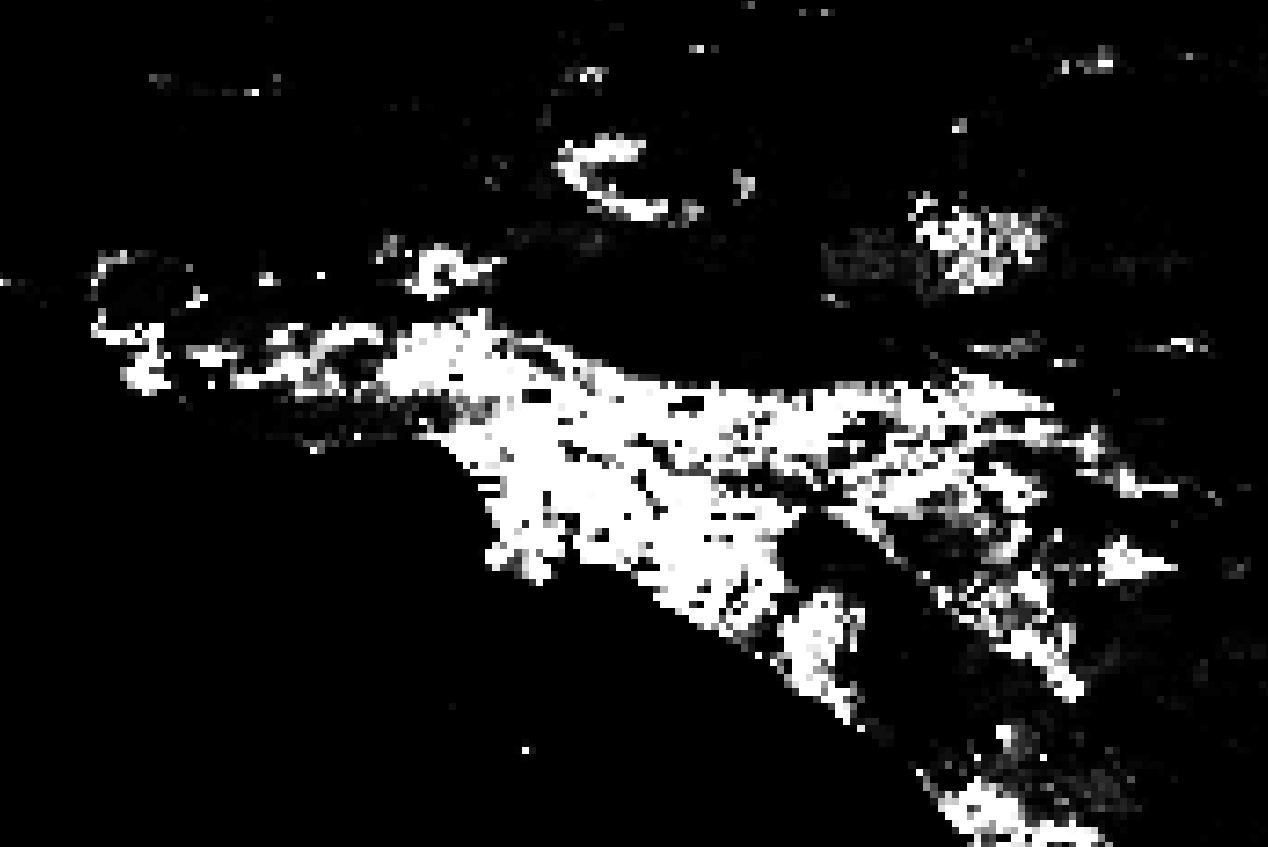

In [19]:
from IPython import display
display.Image("https://i.imgur.com/cdic531.png")

#### Los Angeles Black Marble

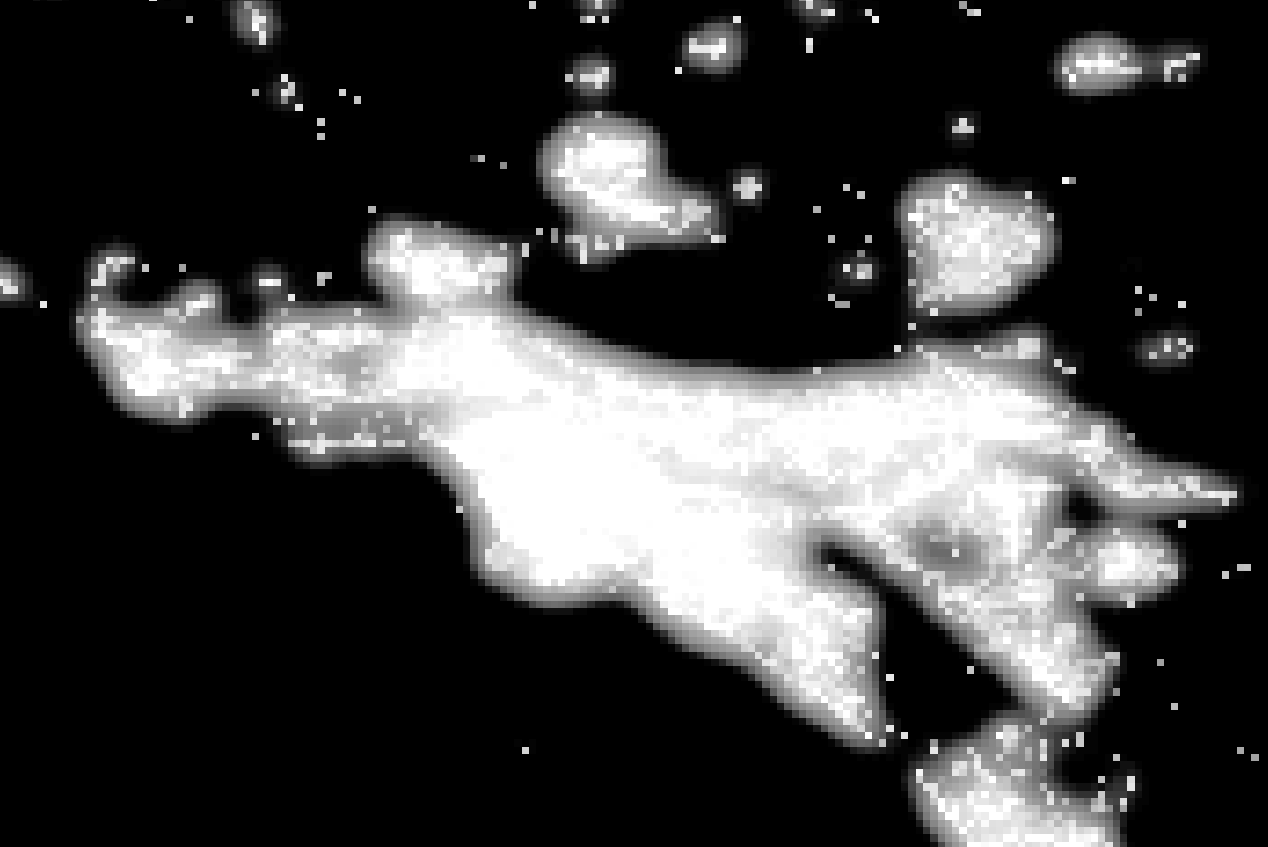

In [20]:
display.Image("https://i.imgur.com/my0d6rx.png")

#### Los Angeles GPW minus Los Angeles Black Marble

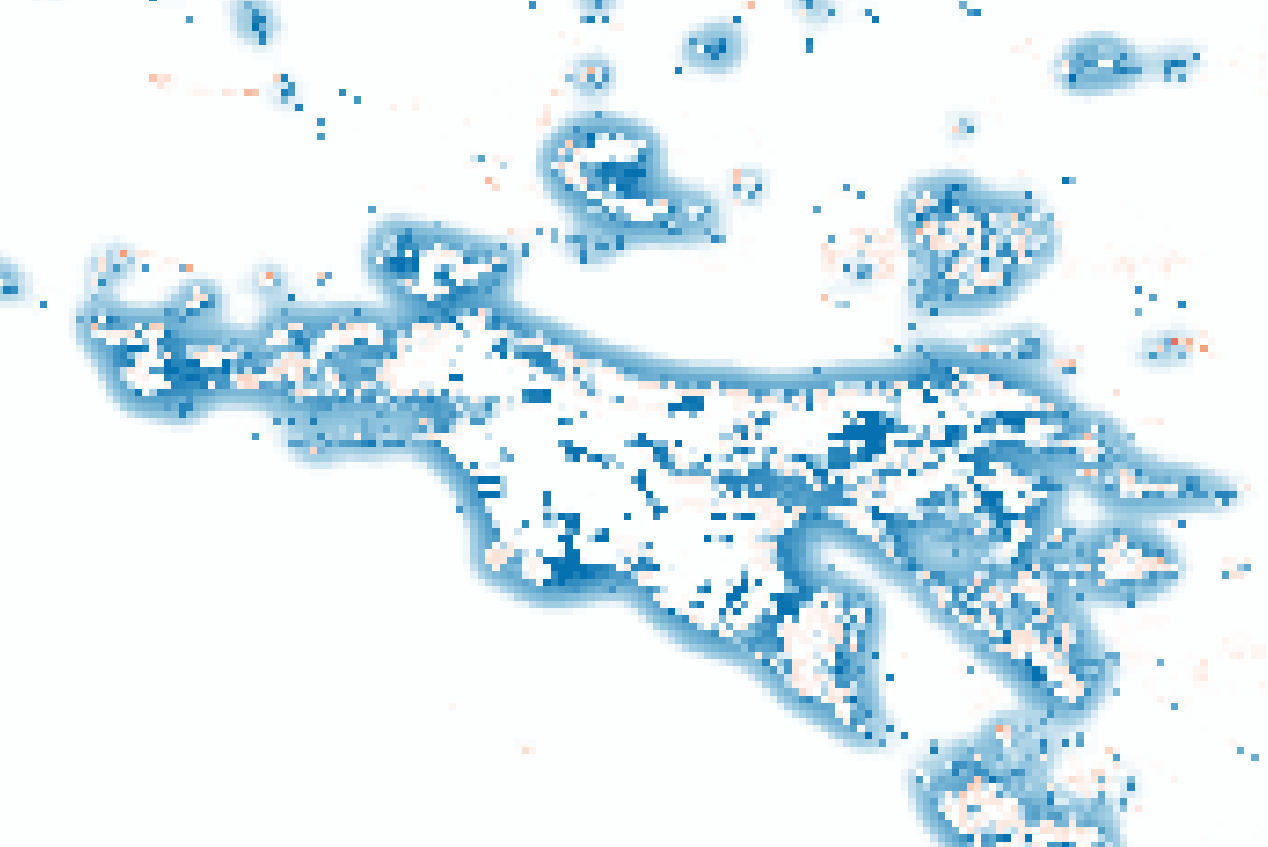

In [21]:
display.Image("https://i.imgur.com/cCkqRxL.png")

# Problem: we need to make the images more comparable

# Smooth the GPW with Gaussian blur

In [22]:
kernel_size = (15,15)

In [23]:
GPW_gaussian = cv2.GaussianBlur(GPW_gray_scaled, kernel_size,0)

In [24]:
array_to_image(GPW_gaussian).save("GPWv4_WORLD_PlateCarre_gaussian_{}_{}.tif".format(kernel_size[0], kernel_size[1]))

#### Los Angeles Gridded Population of the World Smoothed

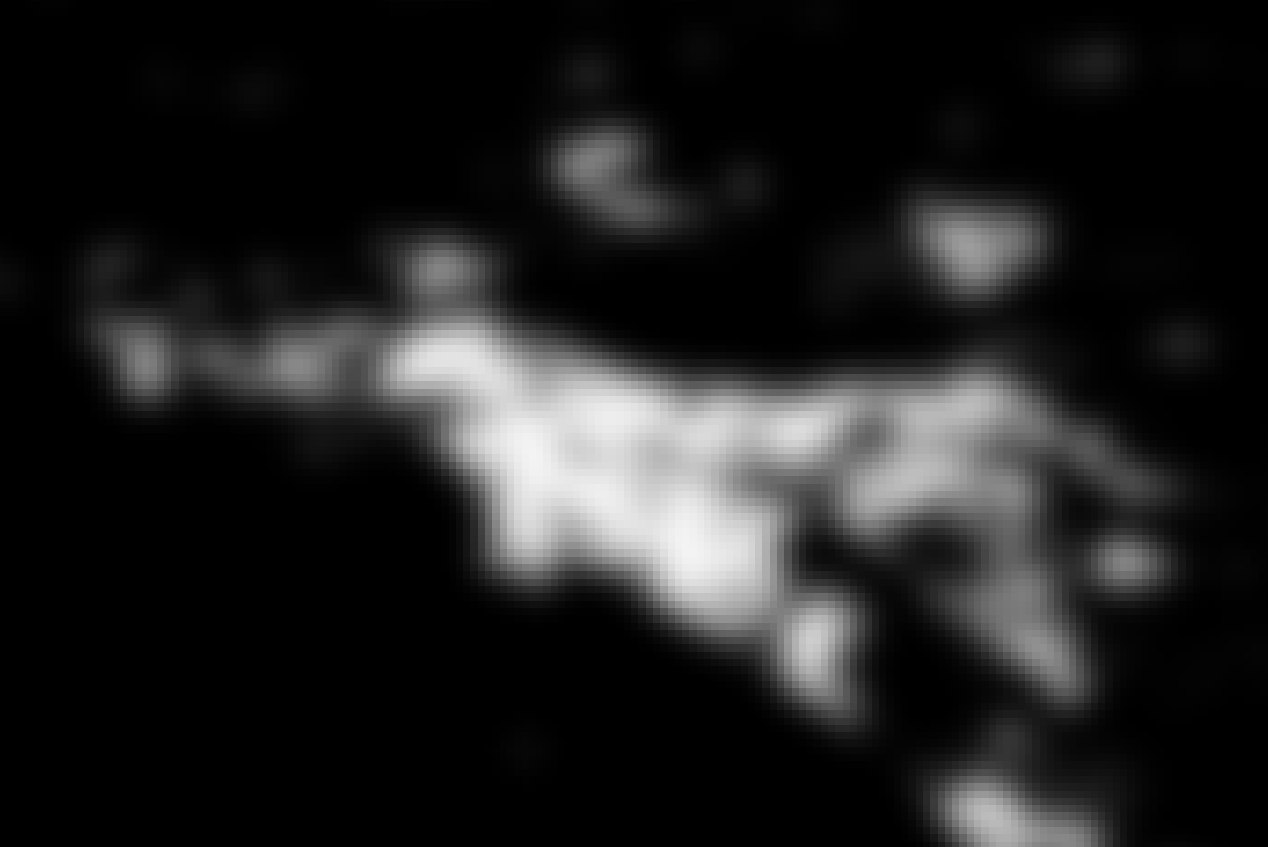

In [25]:
display.Image("https://i.imgur.com/MQ5CE9t.png")

# Enhance contrast in the GPW with cumulative count cut

http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

In [26]:
from skimage import exposure

In [27]:
# Cumulative count cut
p_min, p_max = 0.75, 99.25

# Contrast stretching
pmin, pmax = np.percentile(GPW_gaussian, (p_min, p_max))
GPW_gaussian_stretched = exposure.rescale_intensity(GPW_gaussian, in_range=(pmin, pmax))

In [28]:
array_to_image(GPW_gaussian_stretched).save("GPWv4_WORLD_PlateCarre_gaussian_{}_{}_stretched_{}x{}.tif".format(
    kernel_size[0], kernel_size[1], p_min, p_max))

#### Los Angeles Gridded Population of the World, Smoothed and Contrast Enhanced

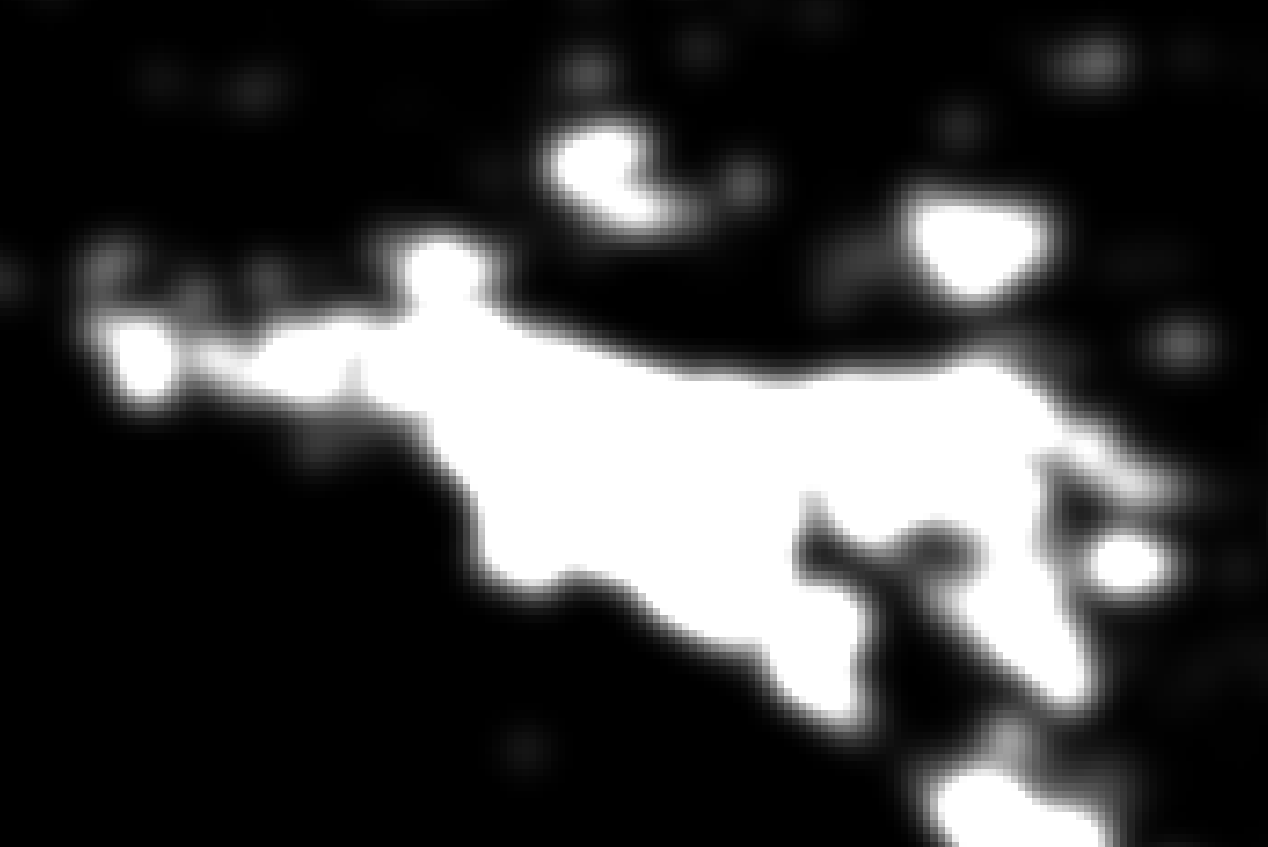

In [29]:
display.Image("https://i.imgur.com/rYjXHIW.png")

# Now we need to smooth out the Black Marble a bit

In [30]:
kernel_size = (3,3)

In [31]:
BM_gaussian = cv2.GaussianBlur(BM_gray_scaled, kernel_size,0)

In [32]:
array_to_image(BM_gaussian).save("BlackMarble_WORLD_PlateCarre_gaussian_{}x{}.tif".format(kernel_size[0], kernel_size[0]))

#### Los Angeles Black Marble with Gaussian Blur

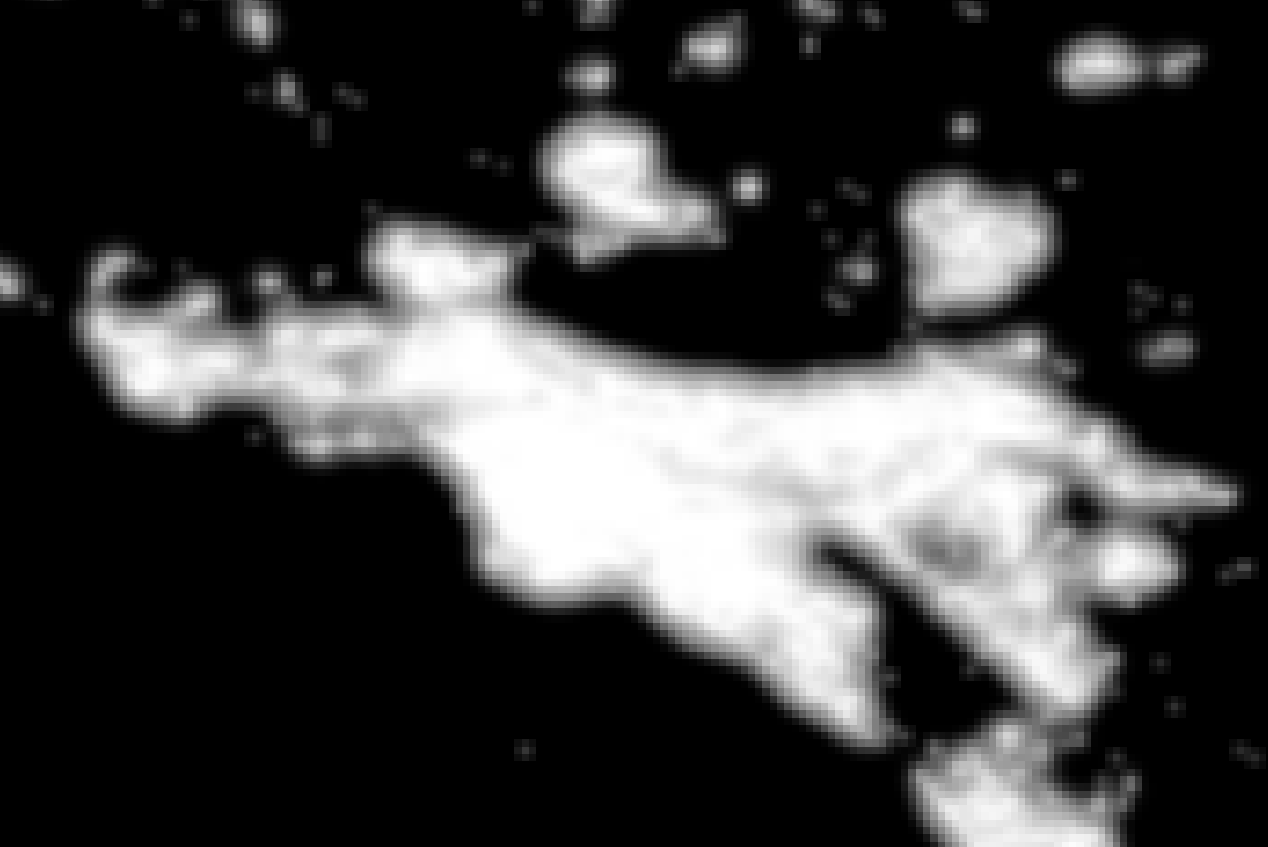

In [33]:
display.Image("https://i.imgur.com/17vJexT.png")

# Enhance contrast in the smoothed Black Marble with cumulative count cut

In [34]:
# Cumulative count cut
p_min, p_max = 0.1, 99.9

# Contrast stretching
pmin, pmax = np.percentile(GPW_gaussian, (p_min, p_max))
BM_gaussian_stretched = exposure.rescale_intensity(BM_gaussian, in_range=(pmin, pmax))

In [35]:
array_to_image(BM_gaussian_stretched).save("BlackMarble_WORLD_PlateCarre_gaussian_{}x{}_enhanced.tif".format(kernel_size[0], kernel_size[0]))

#### Los Angeles Black Marble with Gaussian Blur with Contrast Enhanced

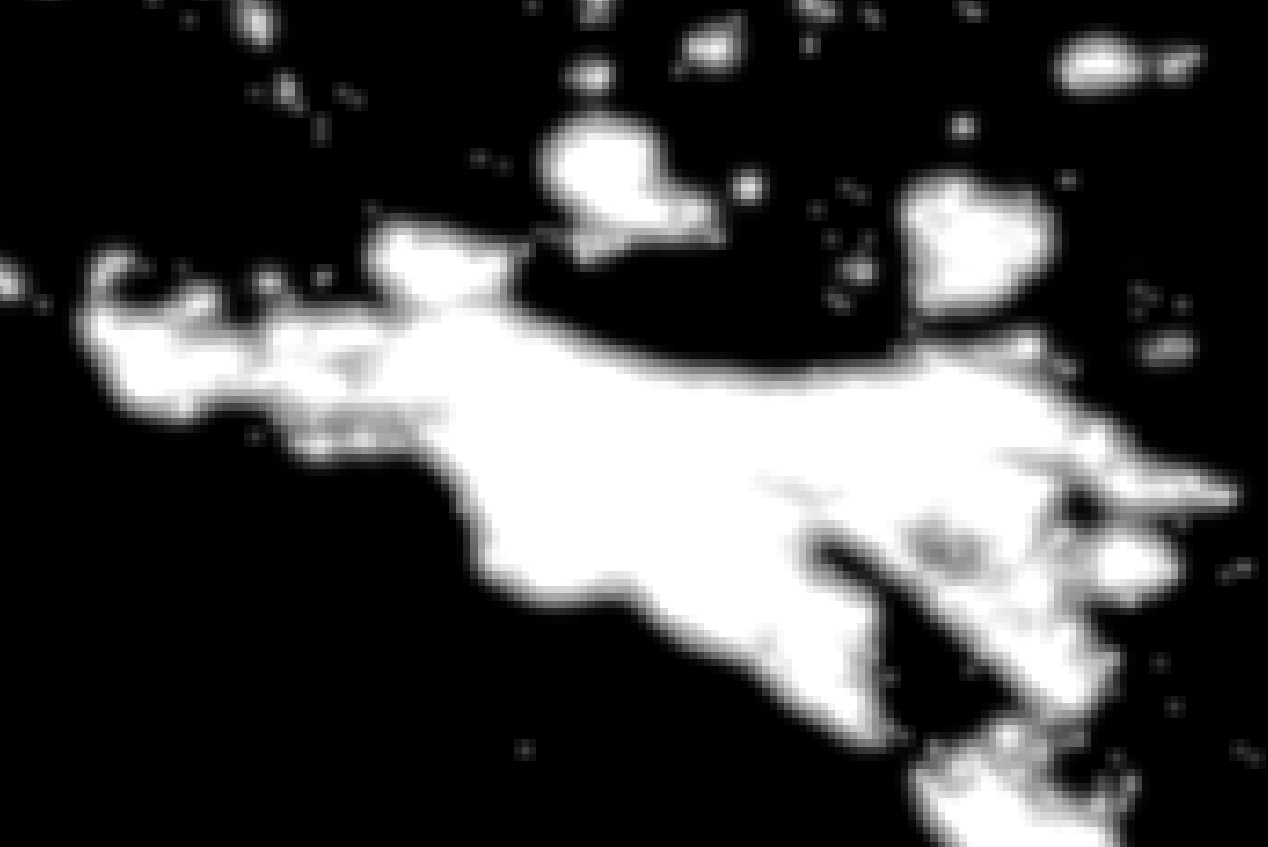

In [36]:
display.Image("https://i.imgur.com/NEMxLyB.png")

# View the final processed images

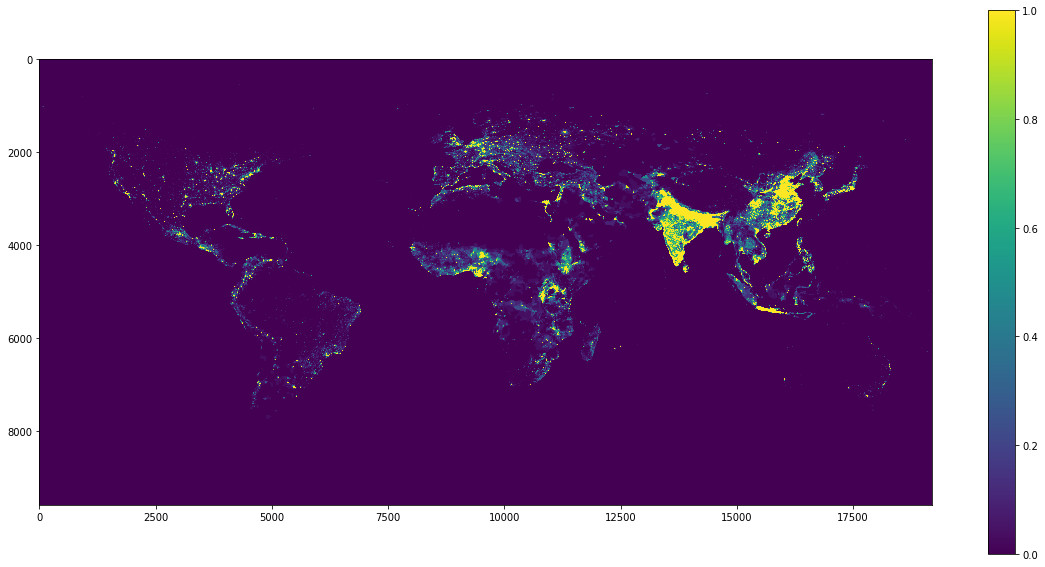

Gridded Population of the World with Gaussian Blur and Contrast Enhanced
Image dimensions: (9600, 19200)


In [37]:
show_image(GPW_gaussian_stretched, "Gridded Population of the World with Gaussian Blur and Contrast Enhanced", cmap='viridis', colorbar=True)

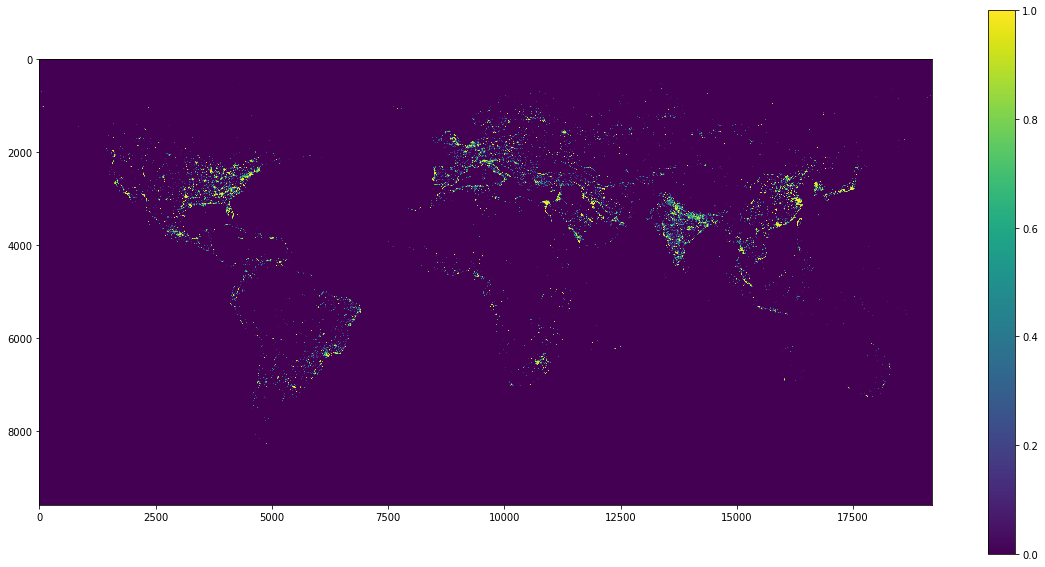

Black Marble with Gaussian Blur and Contrast Enhanced
Image dimensions: (9600, 19200)


In [38]:
show_image(BM_gaussian_stretched, "Black Marble with Gaussian Blur and Contrast Enhanced", cmap='viridis', colorbar=True)

# Calculate difference between smoothed and enhanced images

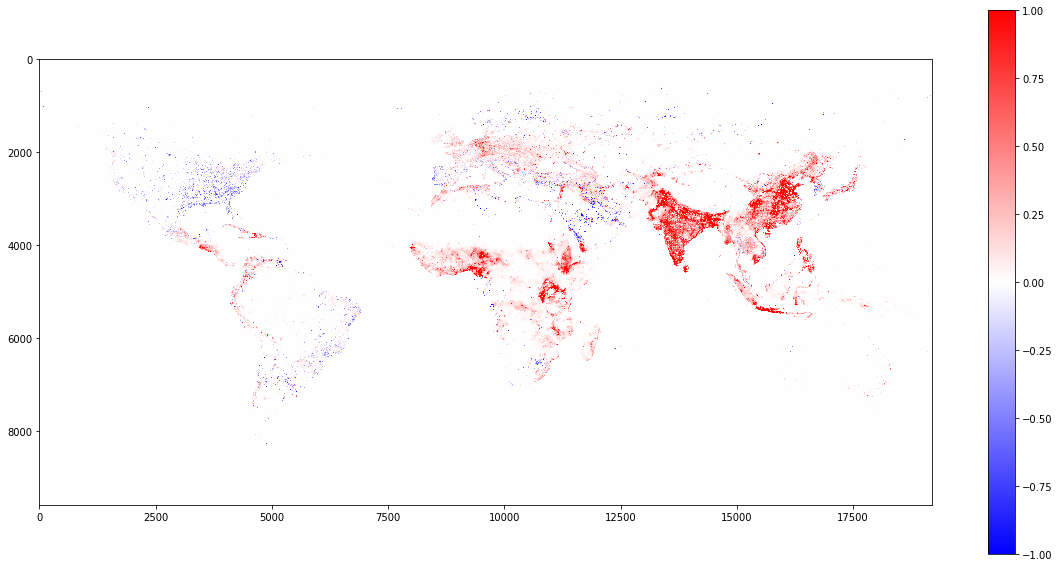

Gridded Population minus Black Marble (Smoothed and Enhanced)
Image dimensions: (9600, 19200)


In [39]:
diff_smoothed = GPW_gaussian_stretched - BM_gaussian_stretched
show_image(diff_smoothed, "Gridded Population minus Black Marble (Smoothed and Enhanced)", cmap='bwr', colorbar=True)

In [40]:
array_to_image(diff_smoothed).save("difference_smoothed_enhanced.tif".format(kernel_size[0], kernel_size[0]))

# Compare Los Angeles Black Marble to GPW (Smoothed and Enhanced)

#### Los Angeles GPW (Smoothed and Enhanced)

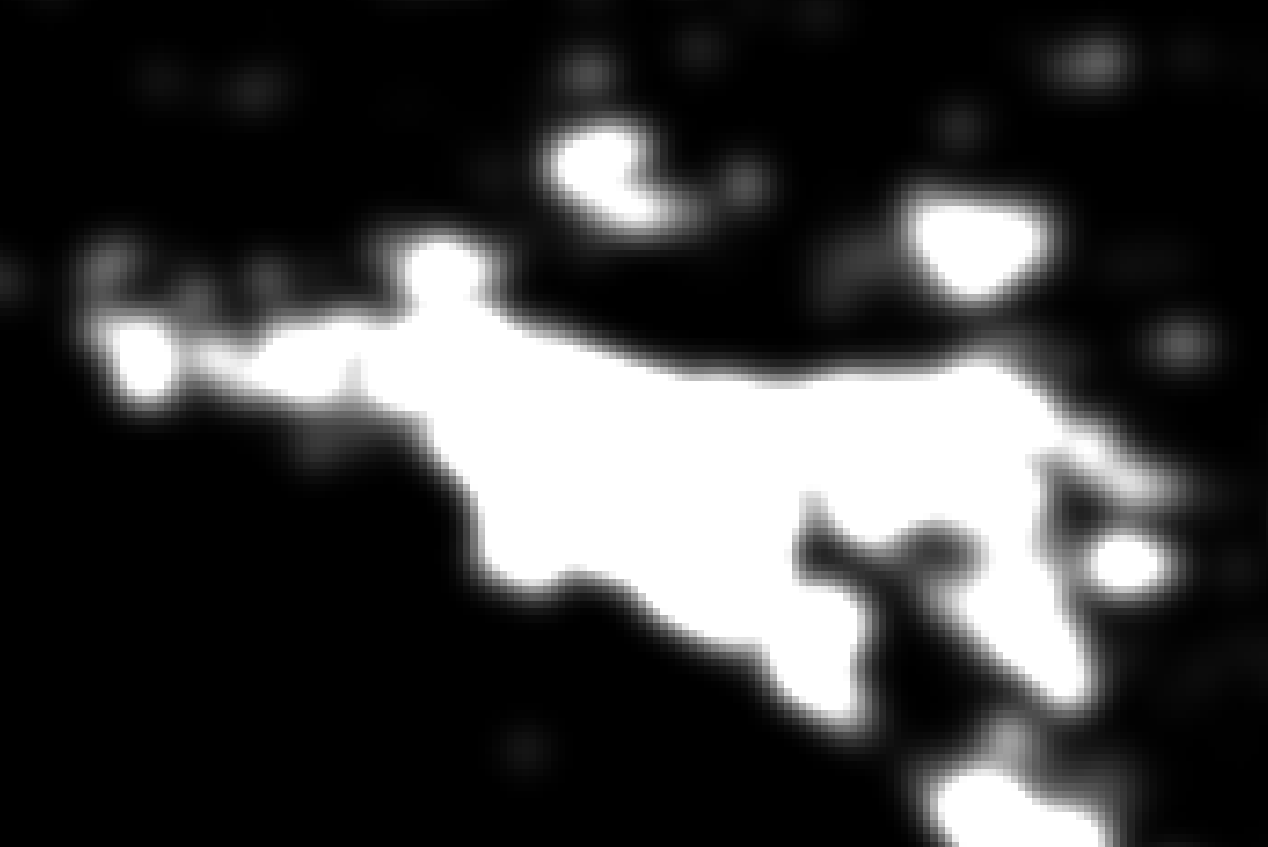

In [41]:
display.Image("https://i.imgur.com/rYjXHIW.png")

#### Los Angeles Black Marble (Smoothed and Enhanced)

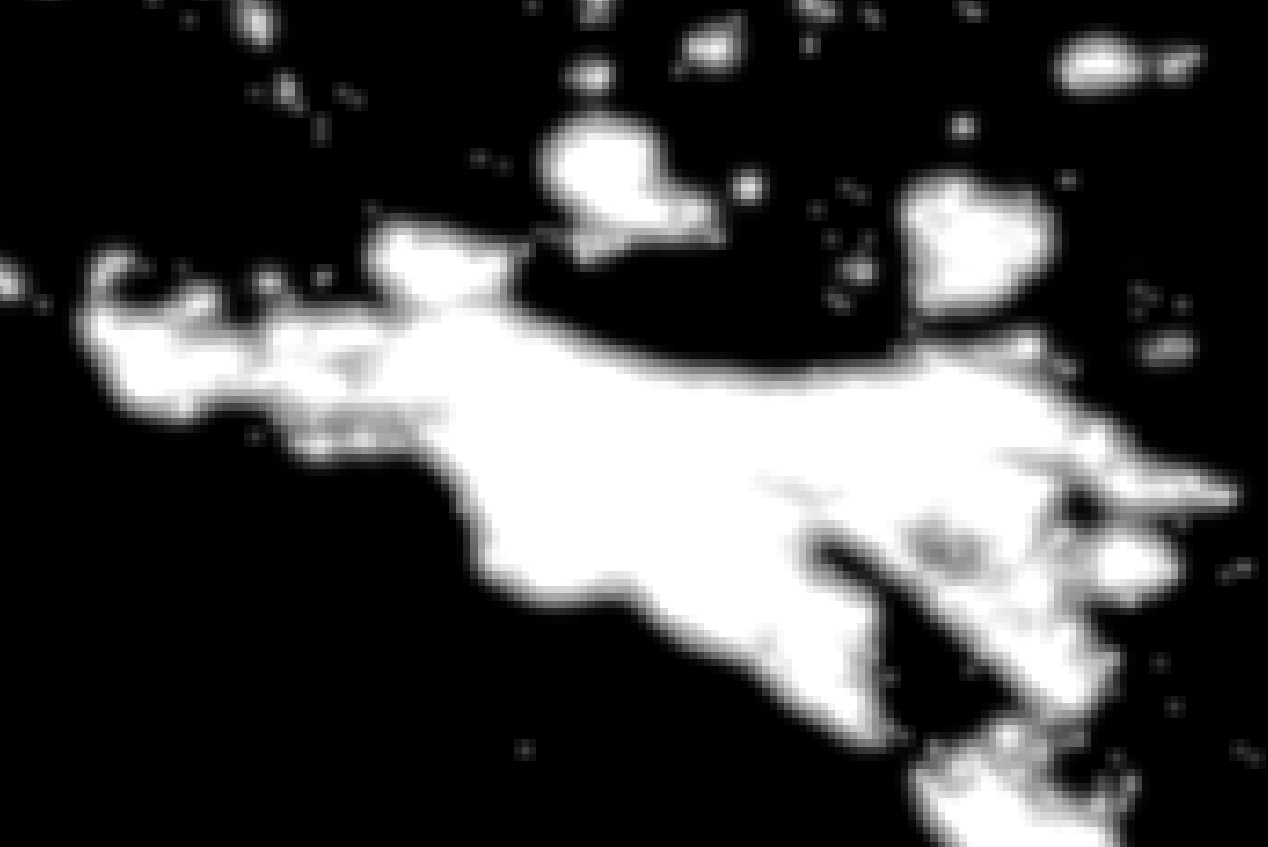

In [42]:
display.Image("https://i.imgur.com/NEMxLyB.png")

#### Difference: Los Angeles GPW (Smoothed and Enhanced) minus Los Angeles BM (Smoothed and Enhanced)

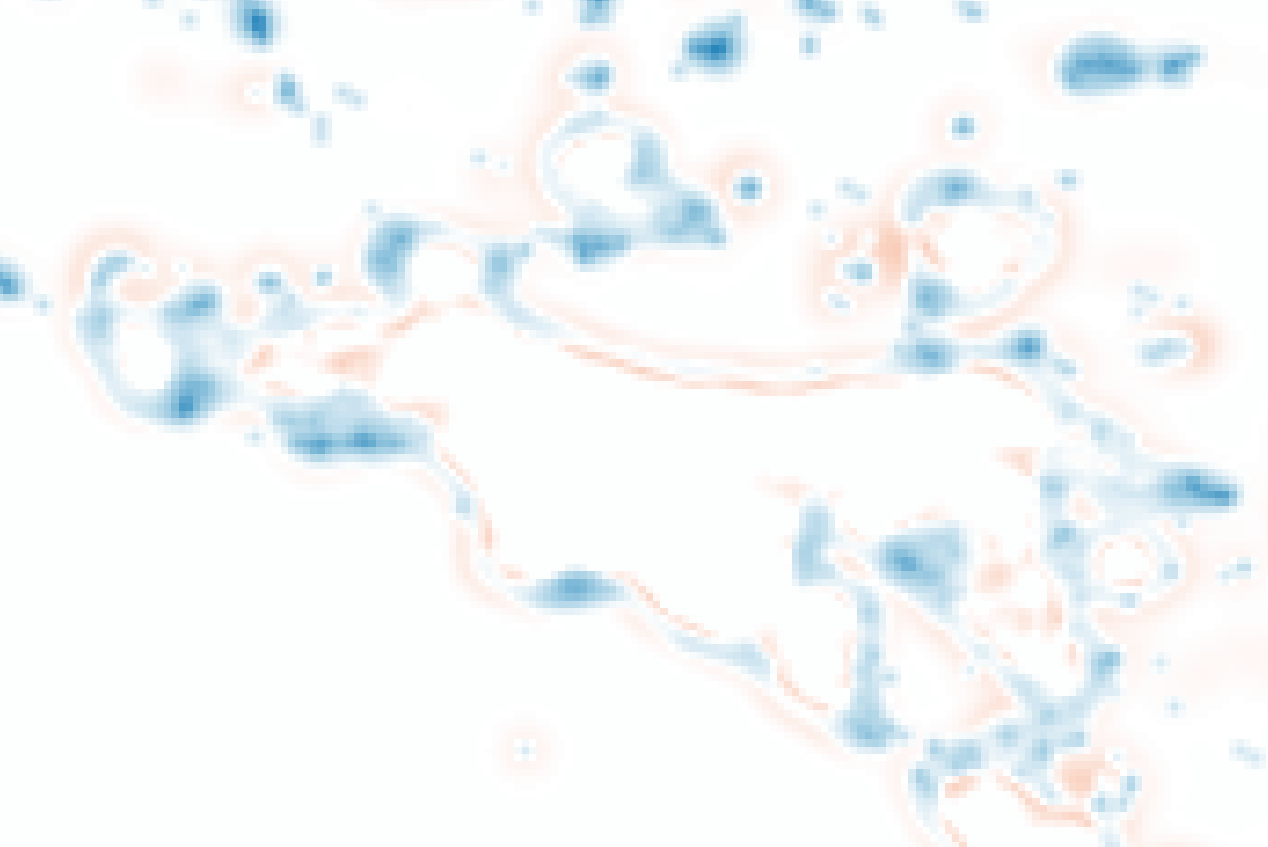

In [43]:
display.Image("https://i.imgur.com/MQV2hL9.png")

# Flatten rasters to 1 dimensional arrays

In [44]:
GPW_gaussian_stretched_flat = GPW_gaussian_stretched.ravel()
GPW_gaussian_stretched_flat.shape

(184320000,)

In [45]:
BM_gaussian_stretched_flat = BM_gaussian_stretched.ravel()
BM_gaussian_stretched_flat.shape

(184320000,)

# Merge 1 dimensional arrays into a dataframe

In [46]:
df = pd.DataFrame({'GPW':GPW_gaussian_stretched_flat, 'BM':BM_gaussian_stretched_flat})

In [47]:
df.head()

,BM,GPW
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [48]:
df.shape

(184320000, 2)

# Select pixels where Black Marble = 1.0 and GPW = 0.0

In [49]:
condition = (df['BM'] == 1.0) & (df['GPW'] == 0.0)

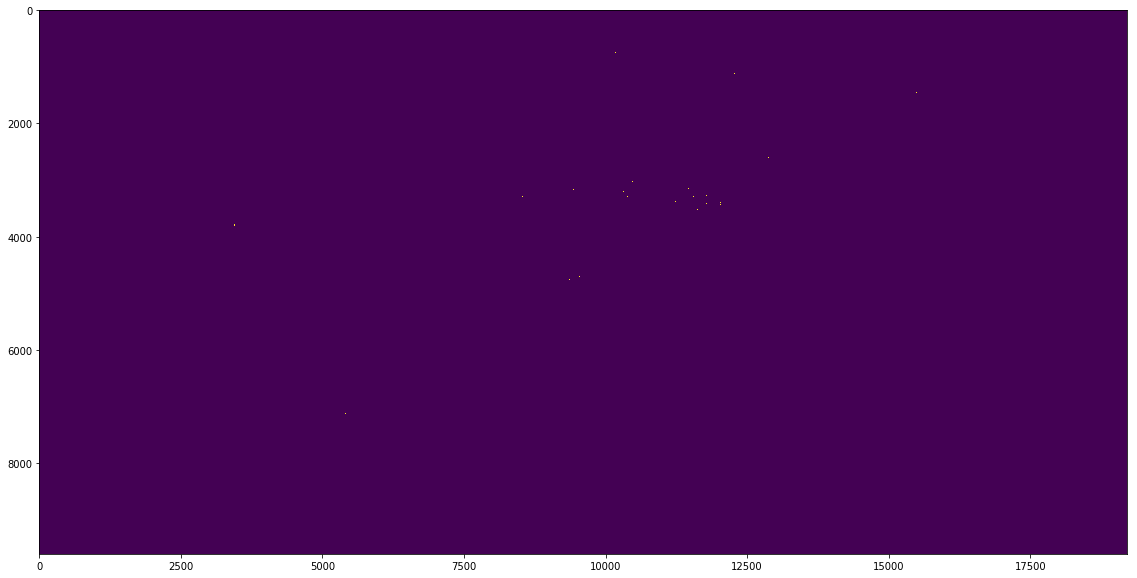

4455 pixels where BM = 1.0 and GPW = 0.0
Image dimensions: (9600, 19200)


In [50]:
df['result'] = condition.astype(int)
result = df['result'].values.reshape(GPW_gaussian_stretched.shape)
show_image(result, "{} pixels where BM = 1.0 and GPW = 0.0".format(sum(condition), cmap='viridis'))

In [51]:
array_to_image(result).save("BM_eq_1_GPW_eq_0_smoothed.tiff")

# Select pixels where Black Marble = 0.0 and GPW = 1.0

In [52]:
condition = (df['BM'] == 0.0) & (df['GPW'] == 1.0)

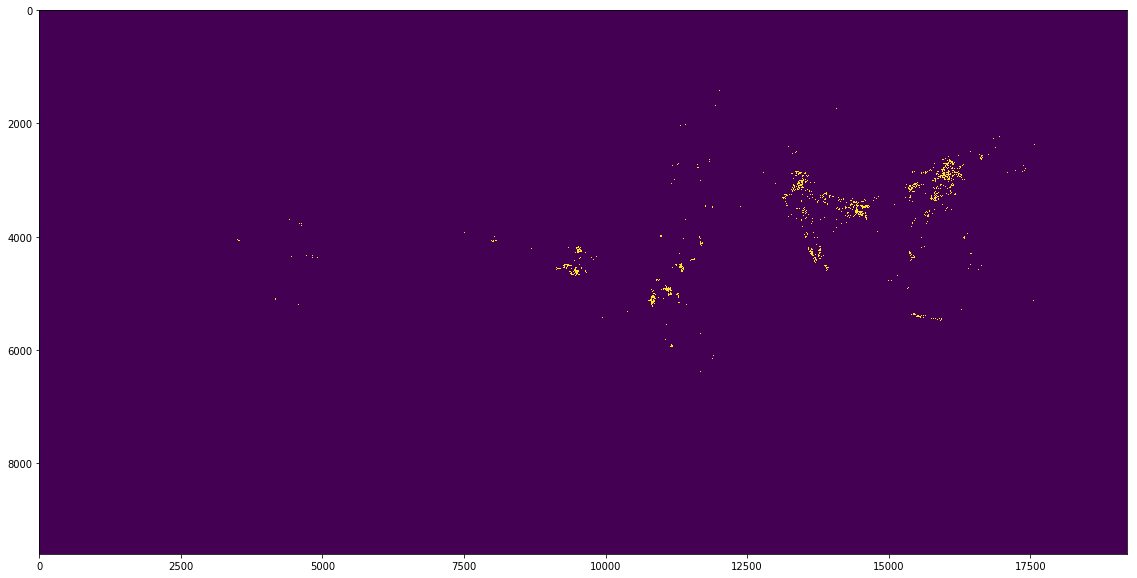

343222 pixels where BM = 0.0 and GPW = 1.0
Image dimensions: (9600, 19200)


In [53]:
df['result'] = condition.astype(int)
result = df['result'].values.reshape(GPW_gaussian_stretched.shape)
show_image(result, "{} pixels where BM = 0.0 and GPW = 1.0".format(sum(condition), cmap='viridis'))

In [54]:
array_to_image(result).save("BM_eq_0_GPW_eq_1_smoothed.tiff")